In [1]:
import numpy as np
from scipy import optimize as opt, linalg as la, interpolate, integrate
import matplotlib.pyplot as plt

# Problem 1

In [2]:
c = lambda x: -.7*(x**2 - 1)
alpha = lambda x: (1 - c(x)**2)**(-.5)

def L(x,y,yp):
    return alpha(x)*np.sqrt(1 + (alpha(x)*yp(x))**2) - alpha(x)**2*c(x)*yp(x)

In [3]:
def T(y,yp):
    return integrate.quad(L, -1, 1, args=(y, yp))[0]

# Problem 2

In [4]:
y = lambda x : (5/2)*(x+1)
yp = lambda x: 5/2
print("Upper Bound:\t", T(y,yp))

Upper Bound:	 3.8770820491384126


$\min_{[-1,1]}\{\sec x\} = 1 \quad \Rightarrow \quad \int_{-1}^1\sec \theta(x)dx \geq \int_{-1}^{1}1dx = 2$

Therefore 2 is a lower bound.

# Problem 3

In [5]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

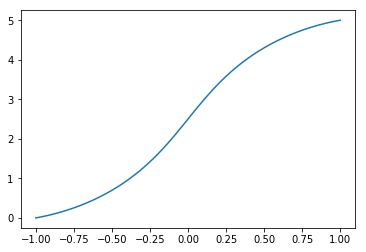

In [7]:
N = 50
D,x = cheb(N)

# define equation to optimize
def F(U):
    c = lambda x: -.7 * (x**2 - 1)
    alph = lambda x: 1/np.sqrt(1 - c(x)**2)
    out = D @ ((alpha(x)**3 * (D@U)) * (1 + (alpha(x) * (D@U))**2)**(-.5) - (alpha(x)**2 * c(x)))
    # Set boundary conditions
    out[0] = U[0] - 5
    out[-1] = U[-1]
    return out

y0 = lambda x: 5*(x+1)/2
x0 = np.array(y0(x)) # initialize guess
y = opt.root(F, x0)['x']
domain = np.linspace(-1, 1, 100)
interpolation = interpolate.barycentric_interpolate(x, y, domain)
plt.plot(domain, interpolation)
plt.show()

# Problem 4

In [8]:
def theta(phi):
    return D@y - c(x)/np.cos(phi) - np.tan(phi)

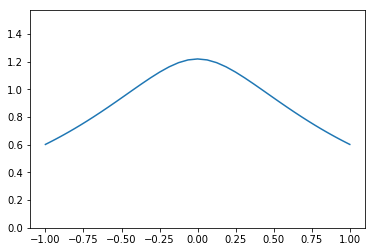

In [9]:
N = 50
D,x = cheb(N)
x0 = np.zeros(N+1)
solution = opt.root(theta, x0)['x']
plt.plot(x, solution)
plt.ylim(0,np.pi/2)
plt.show()